In [1]:
# draw distance to target key and speed for eye and hand
import os
import csv
import numpy

In [2]:
#get and add event key into tlogList
def addEventKey(tlogList):
    temp = []
    for line in tlogList:
        
        if line[3] == '-120':
            line.append(line[4])
            temp = line
        else:
            if len(line[4])>len(temp[4]):
                n = len(line[4])-1
                str1 = line[4][n]
                line.append(str1)
            if len(line[4])<len(temp[4]):
                line.append('B')
            temp = line
    return tlogList

In [3]:
#delete the rows after the last character in alltlogs

def deleteTheRows(tlogRows):
    flag = 0
    deleteList = []
    for line in tlogRows:
        if len(line)== 7:
            #print(line)
            deleteList.append(flag-1)
            deleteList.append(flag)
        flag = flag + 1
    #delete from the back (biggest index), so need sort
    deleteList1 = sorted(deleteList, reverse = True)
    for item in deleteList1:
        #print(tlogRows[item])
        del tlogRows[item]
    return tlogRows

In [4]:
#read all files in tlogs

def readAlltlogs():
    path = '.\\PJ0009\\data\\tlogs_' #文件夹目录  
    files= os.listdir(path) #得到文件夹下的所有文件名称  
    tlogs = []
    for file in files: #遍历文件夹
         sentence = (file.split('.')[0]).split('_')[3]
         block = (file.split('.')[0]).split('_')[2]
         if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开  
              f = open(path+"\\"+file, 'r', encoding = 'utf8'); #打开文件
              reader = csv.reader(f)
              flag = 0
              for line in reader:
                #print(line)
                flag = flag + 1
                if flag ==1 or flag==2:
                    continue
                if flag > 2:
                    #add sentence on tlogs
                    temp = line
                    temp.append(block)
                    temp.append(sentence)
                    tlogs.append(temp)
                    line[3] = str(int(line[3].split('.')[0])-120)
              f.close()
    #print (tlogs)
    return tlogs

In [5]:
#read one fixations file

def readFixations(subject, block, sentence, t1, t2):
    path = ".\\PJ0009\\data\\fixations_"+"\\fixations_"+str(subject)+"_"+str(block)+"_"+str(sentence)+".csv"
    fixations = []
    # see if the file exist
    if os.path.isfile(path):
        f = open(path);
        reader = csv.reader(f)
        flag = 0
        for line in reader:
            flag = flag + 1
            if flag > 1 and t1<float(line[3])<t2:
                fixations.append(line)
        f.close()
        #print(fixations)
    return fixations

In [6]:
#read one finger file

def readFinger(subject, block, sentence, t1, t2):
    path = ".\\PJ0009\\data\\finger_"+"\\finger_"+str(subject)+"_"+str(block)+"_"+str(sentence)+".csv"
    finger = []
    # see if the file exist
    if os.path.isfile(path):
        f = open(path);
        reader = csv.reader(f)
        flag = 0
        for line in reader:
            flag = flag + 1
            if flag > 1 and t1<float(line[3])<t2:
                finger.append(line)
        f.close()
        #print(finger)
    return finger

In [7]:
# convert x and y to pixels 

def x_cm2pic(x):
    xscale =1838-594 ; x0 = 94; xim = 500
    return x*xscale+x0+xim
    
def y_cm2pic(y):
    yscale =2524-1920 ; y0 = 1720; yim = 200
    return y*yscale+y0+yim

def xy_cm2pic(x,y):
    return [x_cm2pic(x),y_cm2pic(y)]

# return key position
def KeyToXY(key):
    keys_ = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'å', 'a', 's', 'd', 'f', 
             'g', 'h', 'j', 'k', 'l', 'ö', 'ä', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'B', ' ']
    xs = [566, 697, 828, 959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 566, 697, 828, 
          959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 740, 900, 1060, 1220, 1380, 1540, 
          1700, 1872, 1220]
    ys = [2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2248, 2248, 2248, 
          2248, 2248, 2248, 2248, 2248, 2248, 2248, 2248, 2452, 2452, 2452, 2452, 2452, 2452, 
          2452, 2455, 2656]
    if key not in keys_:
        return []
    else:
        p = keys_.index(key)
        return [xs[p], ys[p]]


In [8]:
# Distance between target Key and finger position
def distanceKeyFinger(key,finList):
    
    FingerDisList = []
    if len(finList)!=0:
        for line in finList:
            x1 = x_cm2pic(float(line[5]))
            y1 = y_cm2pic(float(line[6]))
            if not len(KeyToXY(key))==0:
                x2 = KeyToXY(key)[0]
                y2 = KeyToXY(key)[1]
                # convert from pixel to cm
                dis = (0.4448336*numpy.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)))/100
                FingerDisList.append(dis)
        return FingerDisList

In [9]:
# Distance between target Key and Eye position
def distanceKeyFixation(key,fixList):
    
    EyeDisList = []
    if len(fixList)!=0:
        for line in fixList:
            x1 = x_cm2pic(float(line[5]))
            y1 = y_cm2pic(float(line[6]))
            if not len(KeyToXY(key))==0:
                x2 = KeyToXY(key)[0]
                y2 = KeyToXY(key)[1]
                # convert from pixel to cm
                dis = (0.4448336*numpy.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)))/100
                EyeDisList.append(dis)
        return EyeDisList

In [10]:
# Finger Speed

def speedFinger(finList):
    
    fingerSpeedList = []
    if len(finList)!=0:
        fingerSpeedList.append(0)
        for index in range(len(finList)-1):
            x2 = x_cm2pic(float(finList[index+1][5]))
            y2 = y_cm2pic(float(finList[index+1][6]))
            x1 = x_cm2pic(float(finList[index][5]))
            y1 = y_cm2pic(float(finList[index][6]))
            # convert from pixel to cm
            DisFin = (0.4448336*numpy.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)))/100
            # *1000 ms to s
            SpeedFin = (DisFin/(finList[index+1][3]-finList[index][3]))*1000
            fingerSpeedList.append(SpeedFin)
    return fingerSpeedList

In [11]:
# Eye Speed

def speedFixation(fixList):
    
    fixationSpeedList = []
    if len(fixList)!=0:
        fixationSpeedList.append(0)
        for index in range(len(fixList)-1):
            x2 = x_cm2pic(float(fixList[index+1][5]))
            y2 = y_cm2pic(float(fixList[index+1][6]))
            x1 = x_cm2pic(float(fixList[index][5]))
            y1 = y_cm2pic(float(fixList[index][6]))
            # convert from pixel to cm
            DisFix = (0.4448336*numpy.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)))/100
            # *1000 ms to s
            SpeedFix = (DisFix/(fixList[index+1][3]-fixList[index][3]))*1000
            fixationSpeedList.append(SpeedFix)
    return fixationSpeedList

In [12]:
def showFigure(title, disKFin, disKFix, speFin, speFix, fingerListT, fixationListT):
    import matplotlib.pyplot as plt 
  
    t = title
    subFigure1 = plt.subplot(211)
    subFigure2 = plt.subplot(212)

    #Draw distance figure (subFigure1)
    plt.sca(subFigure1)
    plt.xlabel('Time(s)')  
    plt.ylabel('Distance(cm)')
    plt.title(t)
    
    if len(fingerListT)!=0:
        plt.plot(fingerListT,disKFin,"x-",label="FingerDistance") 
    if len(fixationListT)!=0:
        plt.plot(fixationListT,disKFix,"+-",label="EyeDistance")  

    #Draw speed figure (subFigure2)
    plt.sca(subFigure2)

    plt.xlabel('Time(s)')  
    plt.ylabel('Speed(cm/s)') 
    
    if len(fingerListT)!=0:
        plt.plot(fingerListT,speFin,"x-",label="FingerSpeed")
    if len(fixationListT)!=0:
        plt.plot(fixationListT,speFix,"+-",label="EyeSpeed")  
        
    plt.savefig(t+".png")
    plt.show()

1_502_1_112_1→ä
-----------------------------
[0.49877010063122085, 0.53312005136644069, 0.57223902247930747, 0.60001136736298211, 0.69412863298243277, 0.7508970470805002, 0.75447028257556892, 0.69809210389061638, 0.66125127724467481, 0.56621764276379205, 0.56534456606892614, 0.5849080027352036, 0.56766648170298628]
-----------------------------
[2.3089810289660555, 2.3060024534380257, 2.325253804614416, 2.6750615981848385, 2.6771471257942148, 2.6776058191656729, 2.6696046279091599, 2.7494467497298594, 2.7586731636405957]
-----------------------------
[0, 8.6306200355273486, 5.1172628324494465, 4.0845536103523274, 5.0885166960381802, 1.910696051191517, 2.3306620644651321, 5.6572795509199425, 6.5287857996995964, 9.2624438744268875, 2.2194890170432053, 1.0886961484270155, 0.52700308045865307]
-----------------------------
[0, 0.68221417187341982, 0.47617435509489769, 6.8434912312114875, 0.54316063727817299, 2.4192011649113225, 1.7979831691231738, 2.0143535744200065, 0.29045574024470255]


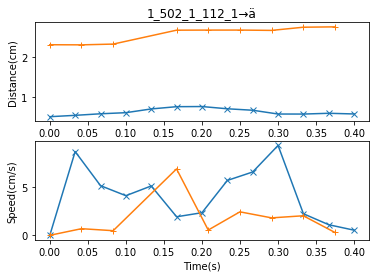

2_502_1_112_ä→n
-----------------------------
[1.4394706184505117, 1.1324678597793494, 0.76719768068008154, 0.69442552825339487, 0.8009194689011343, 0.98169283360373749, 1.271400913458097, 1.4653970503987379, 1.4197259105054667, 1.1259210030529392, 0.93788791737093258, 0.88373821009900277, 0.83813458909170524, 0.79564963834151281, 0.84524332369872934, 0.91697099748890831, 0.899360746614144]
-----------------------------
[2.8376102529873846, 2.8074783184294709, 2.8512108521985944, 2.9331099539170173, 2.9835062604571978, 2.8953381692111733, 2.7322210435366299]
-----------------------------
[0, 11.069817490196844, 18.908908726177657, 19.666803021570971, 17.277346562501855, 16.113988639591376, 12.641906633146812, 6.8368306348711512, 3.2494854269354989, 11.170192148449889, 7.9136477777812031, 1.7652602451012045, 1.5642667585965793, 4.6622312317744345, 9.1880399032287752, 2.1526463532083779, 1.1983321345851077]
-----------------------------
[0, 0.73681587192094578, 8.7572811772578056, 19.945

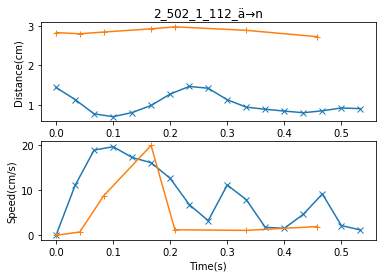

3_502_1_112_n→r
-----------------------------
[2.3222820128202217, 2.4727958575703939, 2.7314358479010834, 2.6317021301154568, 1.9857257767799206, 1.3112994271361855, 1.1473037087755724, 1.2369638872423163, 1.2259481130641161, 1.0168947246644104, 1.0336376077281995, 1.2373698246337594, 1.2728241822621944, 1.1682008457865281, 1.066682537039813, 1.084878777673761, 1.0583270415429056]
-----------------------------
[5.0284086159066899]
-----------------------------
[0, 15.121676626975947, 18.395101429465353, 10.970664795315662, 21.392517844970424, 24.004123287498196, 13.980153252810751, 7.5594601591952149, 4.6036020528176023, 7.487727989428647, 3.1939565967849304, 6.1566138057626167, 4.6484433850528895, 9.611139593023708, 13.796639011941492, 1.7372965949636379, 1.1489424281249905]
-----------------------------
[0]
-----------------------------
[0.0, 0.033343999999999936, 0.06668800000000011, 0.10003300000000001, 0.13337699999999994, 0.16672199999999998, 0.20006600000000002, 0.2334109999999

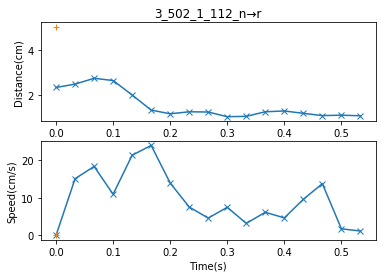

4_502_1_112_r→s
-----------------------------
[1.0707646248863647, 0.69252066326830242, 0.31569969932819908, 0.58048178204356093, 0.79778788178317672, 0.90714435137946259, 1.0288678878147213, 1.0733635030951014, 0.96678879289992636, 0.87146366521278595, 0.84935064904616508, 0.81911299328203779]
-----------------------------
[2.0498945424746831, 1.9581123028953729, 1.9201922527298259, 1.76355528329842, 1.6742177606027104]
-----------------------------
[0, 11.855751744991242, 18.017286969510984, 14.888642326440227, 7.0778029134665248, 3.8390692006563922, 4.4112281442484971, 2.9050295666057533, 7.5555916499529809, 6.3306718222551197, 1.3901999920458674, 0.91404605170833442]
-----------------------------
[0, 3.0468094807334789, 1.4455018014050312, 14.350415499588117, 3.0768961254500229]
-----------------------------
[0.0, 0.03334500000000003, 0.0666890000000003, 0.10003300000000036, 0.13337800000000016, 0.1667220000000002, 0.20006700000000024, 0.23341100000000006, 0.2667560000000001, 0.300

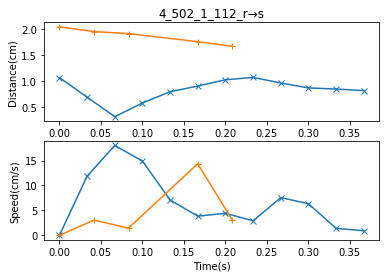

5_502_1_112_s→t
-----------------------------
[2.8144234939127681, 2.7579127183567618, 2.3797123305830485, 1.6804481428425904, 0.97772983919245515, 0.56876618583559613, 0.4315199485110528, 0.39977503556242011, 0.47581972364781377, 0.62356546638779309, 0.69019616633799108, 0.71632421455818385, 0.71031183484641369, 0.66900027024856645]
-----------------------------
[3.9589570521956925, 3.8402071157498097, 2.4884629858327538, 2.4921113871573821, 2.417190547113222, 2.4709740717660726, 2.4491959837586759, 2.5683203564438086, 2.5817127799945383]
-----------------------------
[0, 6.4435399531675772, 12.492920962374786, 21.198498014602656, 21.09286210093682, 12.694963077227982, 4.5405225963748359, 1.4885474727801649, 2.4941860137852081, 4.4407414912930943, 5.0395375391085642, 7.8413463170536879, 0.35818603042204994, 1.4753805564771545]
-----------------------------
[0, 8.7813861313323933, 11.610789119506673, 2.5583533119747508, 2.6962137723198589, 1.7343449556361741, 3.414502083372247, 2.87117

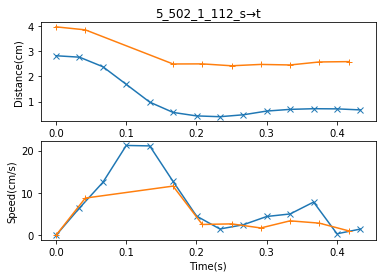

6_502_1_112_t→ä
-----------------------------
[4.052752955789404, 3.6859956393900095, 2.9758152325219198, 2.1327871128753135, 1.2973772774619345, 0.69129438939395893, 0.35252271483278813, 0.15907319739354181, 0.08891721944782352, 0.16704443203348057, 0.21359267598668802, 0.28980858074216453, 0.37566151827710387, 0.46539909311328836, 0.55306179510021569, 0.54359547136799857, 0.56140413968668146]
-----------------------------
[4.1330676920982103, 3.6568950219462595, 3.649214458031647]
-----------------------------
[0, 11.212937651782743, 21.368479358783176, 25.474364745100488, 25.068636585059551, 18.228479384810576, 10.272060193692329, 5.976830748464022, 3.7417160559637686, 2.5173591194984035, 1.3960732420745734, 2.8044165394217249, 4.2891201707641233, 3.0280584093875347, 4.7668852843052951, 0.66687020786531892, 1.3406534530671725]
-----------------------------
[0, 6.5194151318316891, 2.691565469947014]
-----------------------------
[0.0, 0.033343999999999596, 0.06668899999999985, 0.1000

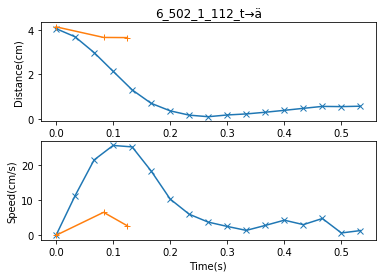

7_502_1_112_ä→n
-----------------------------
[1.617602558914929, 1.1916429635291541, 0.51887078466852732, 0.26798527552362122, 0.74346075914067289, 0.81932397670304635, 0.90163210114109515, 0.97341697981835329, 0.87747535445496017, 0.72765874953997522, 0.78922897764236721, 0.78374993041851004, 0.77776302780160544, 0.7672488393734751]
-----------------------------
[2.8119968107883477, 2.8739528751928844, 2.9061235408680677]
-----------------------------
[0, 12.843266794640703, 20.533970226666142, 22.983348259298136, 15.072876509228953, 5.8956419034764194, 4.5114737627598016, 2.2927281674652771, 4.4071231327273903, 11.240182776474354, 7.3069807440072756, 0.70171878715202085, 0.28328255764191379, 0.66211992304973399]
-----------------------------
[0, 1.6849110273817443, 0.79748277895678932]
-----------------------------
[0.0, 0.033345000000000256, 0.06668899999999985, 0.10003399999999965, 0.13337800000000016, 0.16672299999999995, 0.20006699999999955, 0.23341199999999981, 0.26675599999999

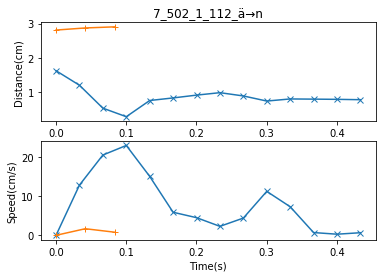

8_502_1_112_n→ 
-----------------------------
[1.2284735050582674, 0.71612904765565366, 0.27493322135879661, 0.54566511850879684, 0.91682963409496832, 1.0377256682159011, 0.96372798825884953, 0.90834370693099298, 0.9473997462537751, 0.90112024120611378]
-----------------------------
[0.31031562076961378, 0.25501860865118997, 0.18480790383149276, 1.6920246927454443]
-----------------------------
[0, 16.037494013842132, 16.790456859981962, 16.564360827387961, 11.194232162627468, 4.334328101692094, 8.0135727963374705, 12.508374788316308, 1.1718157869886243, 1.3916325770201525]
-----------------------------
[0, 1.5290591461145357, 2.3249129318583757, 7.24485484485015]
-----------------------------
[0.0, 0.033343999999999596, 0.06668899999999985, 0.1000329999999999, 0.1333770000000004, 0.1667220000000002, 0.2000659999999998, 0.23341100000000006, 0.26675500000000013, 0.3000999999999999]
-----------------------------
[0.0, 0.041659000000000106, 0.08331899999999996, 0.29161799999999993]
------

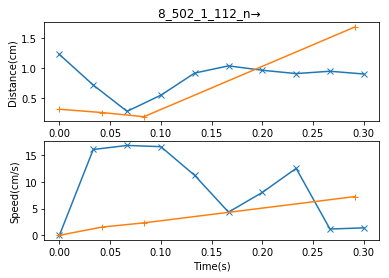

9_502_1_112_ →j
-----------------------------
[1.9596554960859727, 1.9977541845109048, 1.9249644168066944, 1.5490439333905204, 1.0106541540509653, 0.7979538076564765, 0.88744662892360437, 0.94713313329602467, 0.91333855403390884, 0.81263273166230876, 0.74818829015734167, 0.72368604220215071, 0.65804404332309674]
-----------------------------
[3.4779589835493439, 3.4855301438163822, 3.3861401053534634, 3.3572829105404116, 2.1923592617308549, 2.2078183417984527, 2.1216815690038646, 2.1700775706270146]
-----------------------------
[0, 3.9767178777859291, 5.2948938298711044, 11.32751454827606, 16.3232914361041, 7.4771543493485551, 3.5524077871722657, 2.4909053263712351, 4.344578187149863, 10.418265495637922, 10.526759221719455, 0.95441188589326142, 2.0540027908015404]
-----------------------------
[0, 0.93202372257568711, 2.6342130364295206, 0.71273555487623219, 11.860355171254854, 1.0511337300879395, 2.2398543669350421, 3.2537251473403055]
-----------------------------
[0.0, 0.0333450000

KeyboardInterrupt: 

In [14]:
alltlog = deleteTheRows(addEventKey(readAlltlogs()))
trialtimeBefore = float(alltlog[0][3])
flag = 0
for line in alltlog:
    if line[3]=='-120':
        trialtimeBefore = float(line[3])
        lastKey = line[5]
    else:
        if len(line)== 8:
            #structure is['502', '12', '1487340087571', '4945', 'äänrstän jäl', '1', '112', 'l'],
            flag  = flag + 1
            block = line[5]
            ID = str(line[0]).split('.')[0]
            sentence = line[6]
            trialtime = float(line[3])
            eventKey = line[7]
            #print (ID+' '+sentence+' '+str(trialtimeBefore)+' '+str(trialtime))

            fingerList = readFinger(ID, block, sentence,trialtimeBefore,trialtime)
            fixationList = readFixations(ID, block, sentence,trialtimeBefore,trialtime)
            #if the finger or fixation file doesn't exist, then skip this round
            if len(fingerList)==0 or len(fixationList)==0:
                continue
            else:
                fingerListT = []
                fixationListT = []
                # get timeline
                # structure is['502', '1', '30', '557.865', '1', '0.560233', '0.927818']
                #print(fingerList)
                flag1 = 0
                flag2 = 0
                for line1 in fingerList:
                    #print(line1)
                    flag1 = flag1 + 1
                    if(flag1==1):
                        t1 = float(line1[3])
                    line1[3] = float(line1[3])-t1
                    fingerListT.append(line1[3]/1000)
                for line2 in fixationList:
                    flag2 = flag2 + 1
                    if(flag2==1):
                        t2 = float(line2[3])
                    line2[3] = float(line2[3])-t2
                    fixationListT.append(line2[3]/1000)

                disKFin = distanceKeyFinger(eventKey,fingerList)
                disKFix = distanceKeyFixation(eventKey,fixationList)
                speFin = speedFinger(fingerList)
                speFix = speedFixation(fixationList)
                title = str(flag)+"_"+ID+"_"+block+"_"+sentence+"_"+lastKey+"→"+eventKey

                print (title)
                print ("-----------------------------")
                print (disKFin)
                print ("-----------------------------")
                print (disKFix)
                print ("-----------------------------")
                print (speFin)
                print ("-----------------------------")
                print (speFix)
                print ("-----------------------------")
                print (fingerListT)
                print ("-----------------------------")
                print (fixationListT)
                print ("-----------------------------")

                if not (len(disKFin)==0 or len(disKFix)==0 or len(speFin)==0 or len(speFix)==0):
                    showFigure(title, disKFin, disKFix, speFin, speFix, fingerListT, fixationListT)

                trialtimeBefore = trialtime
                lastKey = eventKey
        if len(line)== 7:
            continue
        
        